Projekt MNwS - Aleksander Folfas 411052

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, kstest, chi2

Zadanie 5

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w teście Kołmogorowa i teście 𝜒2 w przypadku weryfikacji zgodności z rozkładem 𝑡-
Studenta o różnych stopniach swobody, tzn. generować dane pochodzące z rozkładu 𝑡-Studenta o 𝑘
stopniach swobody i weryfikować hipotezę, że dane mają rozkład 𝑡-Studenta o 𝑘 st. swobody. Należy
porównać wyniki klasycznego sposobu testowania i testowania z wykorzystaniem PIT (probability
integral transform). Uzyskane wyniki należy przedstawić na odpowiednich wykresach ilustrujących
rozmiary testów z uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu.

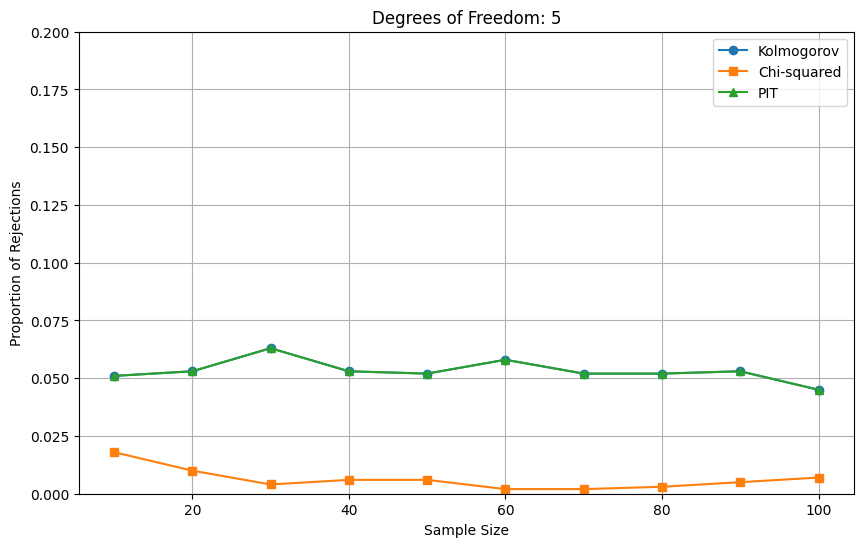

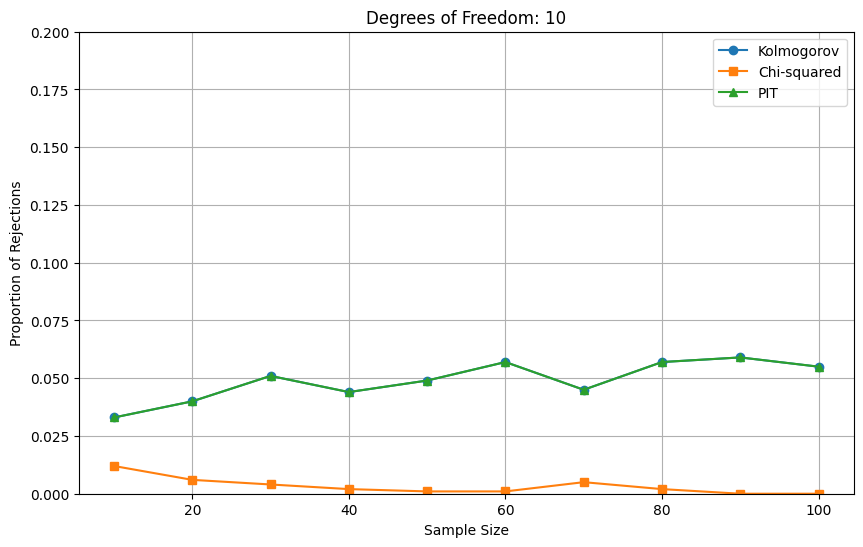

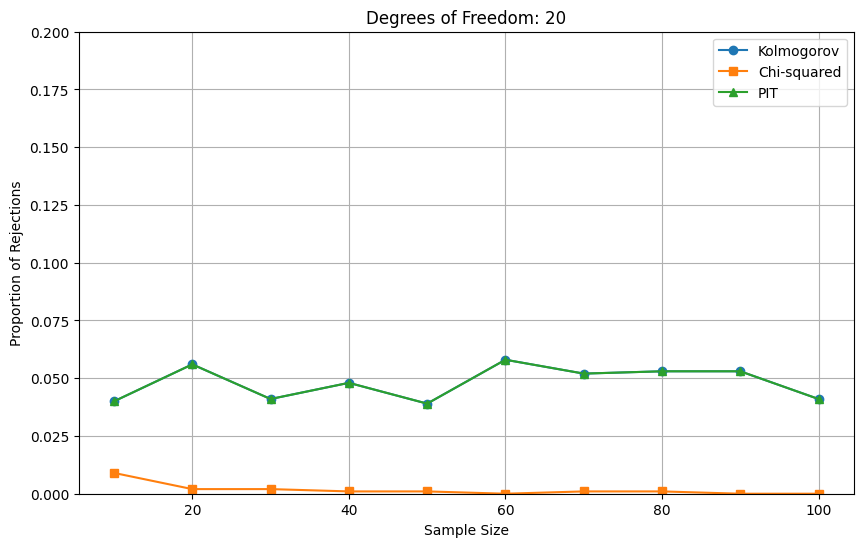

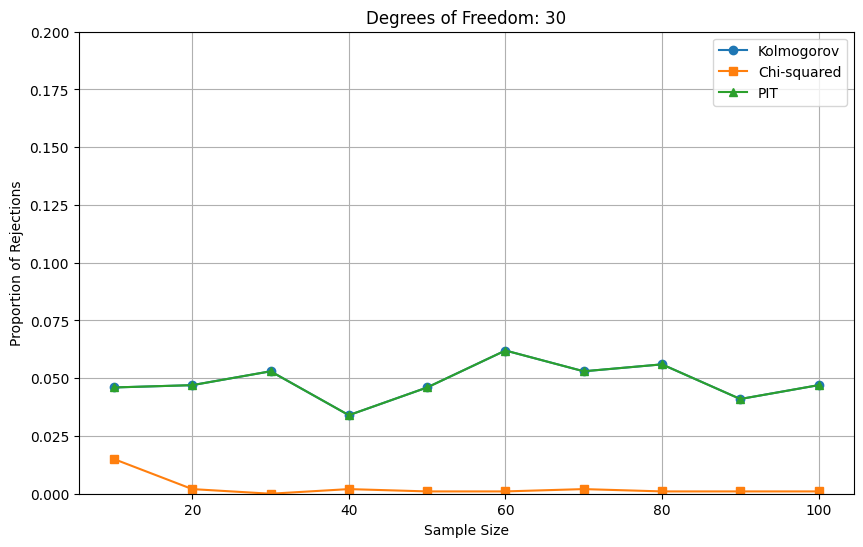

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, kstest, chi2

# Funkcja generująca dane z rozkładu t-Studenta
def generate_t_student_data(n, df):
    return np.random.standard_t(df, size=n)

# Test Kołmogorowa-Smirnowa
def test_kolmogorov(data, df):
    _, p_value = kstest(data, 't', args=(df,))
    return p_value

# Test chi-kwadrat
def test_chi_squared(data, df):
    observed_freq, bin_edges = np.histogram(data, bins='auto', density=True)
    expected_freq = t.pdf(bin_edges[:-1], df)
    chi2_statistic = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
    p_value = chi2.sf(chi2_statistic, len(observed_freq) - 1)
    return p_value

# Test PIT (Probability Integral Transform)
def test_pit(data, df):
    transformed_data = t.cdf(data, df)
    _, p_value = kstest(transformed_data, 'uniform')
    return p_value

# Symulacja odrzuceń dla różnych próbek i stopni swobody
def simulate_rejections(n_samples, df_values):
    rejections_kolmogorov = np.zeros((len(n_samples), len(df_values)))
    rejections_chi_squared = np.zeros((len(n_samples), len(df_values)))
    rejections_pit = np.zeros((len(n_samples), len(df_values)))

    for i, n in enumerate(n_samples):
        for j, df in enumerate(df_values):
            num_rejections_kolmogorov = 0
            num_rejections_chi_squared = 0
            num_rejections_pit = 0

            for _ in range(1000):  # Liczba powtórzeń symulacji dla każdej kombinacji n i df
                data = generate_t_student_data(n, df)

                p_value_kolmogorov = test_kolmogorov(data, df)
                if p_value_kolmogorov < 0.05:  # Poziom istotności 0.05
                    num_rejections_kolmogorov += 1

                p_value_chi_squared = test_chi_squared(data, df)
                if p_value_chi_squared < 0.05:
                    num_rejections_chi_squared += 1

                p_value_pit = test_pit(data, df)
                if p_value_pit < 0.05:
                    num_rejections_pit += 1

            rejections_kolmogorov[i, j] = num_rejections_kolmogorov / 1000
            rejections_chi_squared[i, j] = num_rejections_chi_squared / 1000
            rejections_pit[i, j] = num_rejections_pit / 1000

    return rejections_kolmogorov, rejections_chi_squared, rejections_pit

# Parametry symulacji
np.random.seed(seed=411052)
n_samples = np.arange(10, 110, 10)  # Rozmiary próbek
df_values = [5, 10, 20, 30]  # Stopnie swobody dla generowanego rozkładu

# Wykonaj symulacje
rejections_kolmogorov, rejections_chi_squared, rejections_pit = simulate_rejections(n_samples, df_values)

# Wykres dla każdego stopnia swobody
for j, df in enumerate(df_values):
    plt.figure(figsize=(10, 6))
    
    plt.plot(n_samples, rejections_kolmogorov[:, j], marker='o', label='Kolmogorov')
    plt.plot(n_samples, rejections_chi_squared[:, j], marker='s', label='Chi-kwadrat')
    plt.plot(n_samples, rejections_pit[:, j], marker='^', label='PIT')
    plt.ylim(0, 0.2)

    plt.xlabel('Rozmiar próbki')
    plt.ylabel('Odsetek odrzuceń')
    plt.title(f'Stopnie swobody: {df}')
    plt.legend()
    plt.grid(True)

plt.show()
